In [2]:
from sklearn import tree
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from IPython.display import SVG
from graphviz import Source
from IPython.display import display

from IPython.display import HTML
style = "<style>svg{width: 10% !important; height: 60% !important;} </style>"
HTML(style)

In [3]:
titanic_data = pd.read_csv('titanic.csv')
titanic_data.head(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S


In [4]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
X = titanic_data.drop(['PassengerId','Survived', 'Name', 'Ticket', 'Cabin'], axis=1)
y = titanic_data.Survived

In [6]:
X = pd.get_dummies(X)
X = X.fillna({"Age":X.Age.median()})
X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1


In [7]:
clf = tree.DecisionTreeClassifier(criterion = "entropy")

In [8]:
clf.fit(X, y)

DecisionTreeClassifier(criterion='entropy')

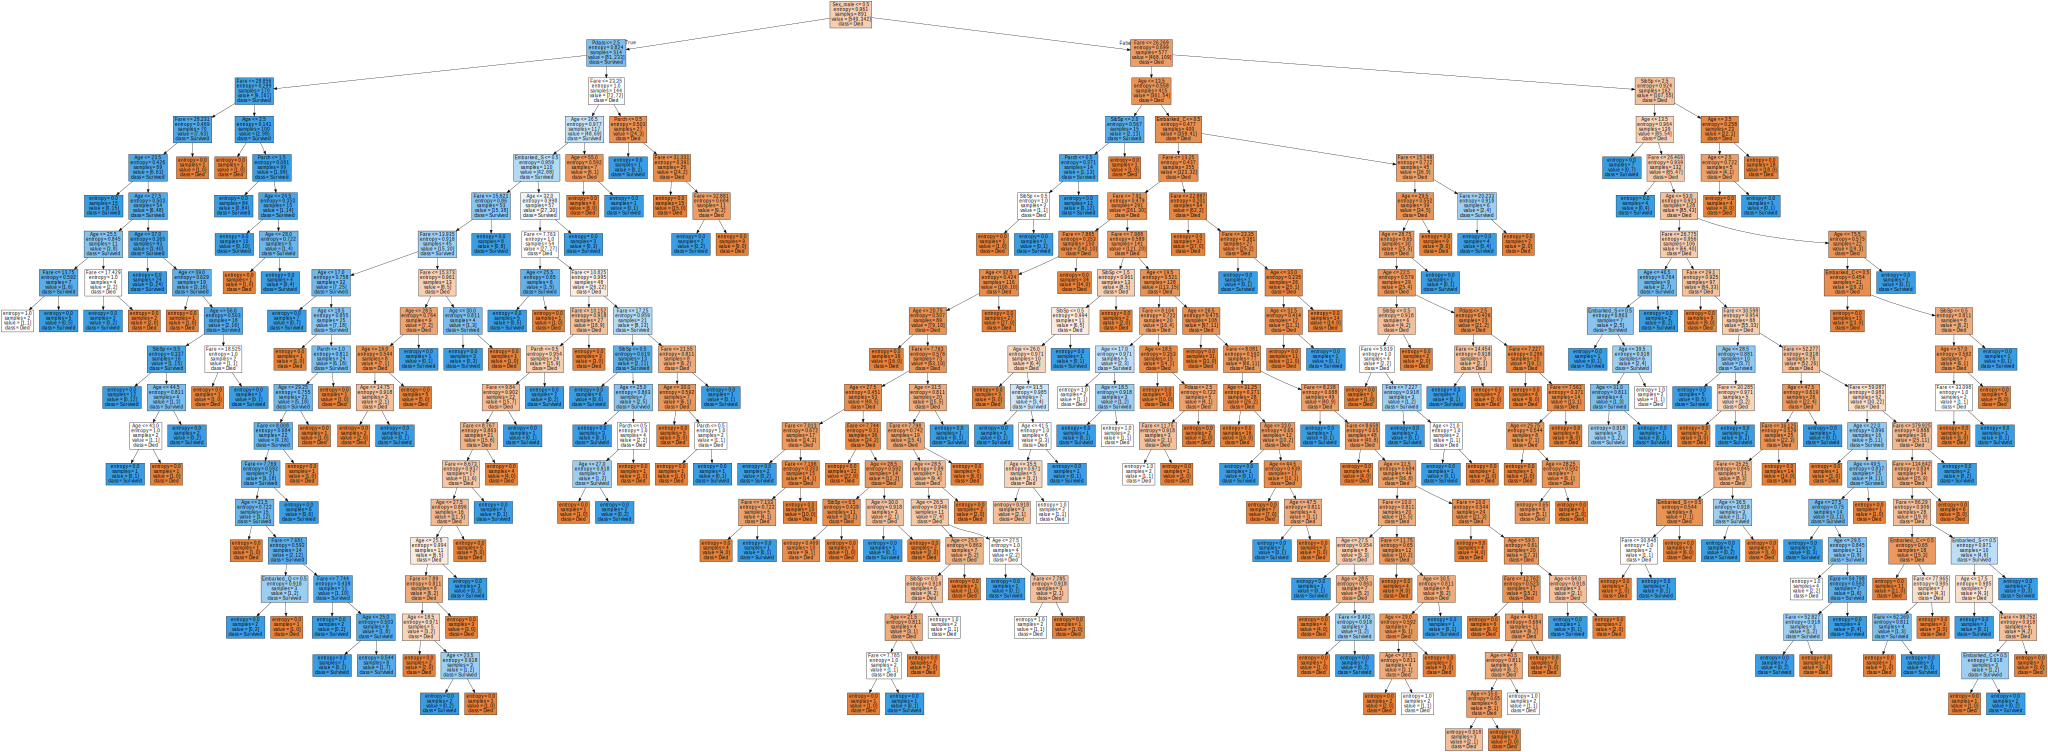

In [9]:
graph = Source(tree.export_graphviz(clf, out_file=None, feature_names=list(X), class_names=['Died','Survived'], filled=True))
display(SVG(graph.pipe(format='svg')))

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [12]:
clf.score(X_train, y_train) 

0.9714765100671141

In [13]:
clf.score(X_test, y_test)

0.9966101694915255

In [14]:
clf = tree.DecisionTreeClassifier(criterion = "entropy", max_depth=5)

In [15]:
clf.fit(X_train, y_train) 
clf.score(X_train, y_train) 

0.8406040268456376

In [16]:
clf.score(X_test, y_test)

0.8101694915254237

In [17]:
max_depth_values=range(1, 100)

In [18]:
scores_data = pd.DataFrame()

In [19]:
for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion = "entropy", max_depth=max_depth)
    clf.fit(X_train, y_train) 
    train_score = clf.score(X_train, y_train) 
    test_score = clf.score(X_test, y_test)
    mean_cross_val_score = cross_val_score(clf, X_train, y_train, cv=5).mean()
    
    temp_score_data = pd.DataFrame({'max_depth':[max_depth], 
                                    'train_score':[train_score], 
                                    'test_score':[test_score], 
                                   'cross_val_score':[mean_cross_val_score]})
    
    scores_data = scores_data.append(temp_score_data)

In [20]:
scores_data.head()

,max_depth,train_score,test_score,cross_val_score
0,1,0.781879,0.796610,0.781961
0,2,0.805369,0.776271,0.770196
0,3,0.823826,0.820339,0.790322
0,4,0.833893,0.823729,0.788627
0,5,0.840604,0.810169,0.798711


In [21]:
scores_data_long = pd.melt(scores_data, id_vars='max_depth', 
                          value_vars=['train_score', 'test_score', 'cross_val_score'],
                          var_name = 'set_type', value_name='score')

In [22]:
scores_data_long.head()

,max_depth,set_type,score
0,1,train_score,0.781879
1,2,train_score,0.805369
2,3,train_score,0.823826
3,4,train_score,0.833893
4,5,train_score,0.840604


<AxesSubplot:xlabel='max_depth', ylabel='score'>

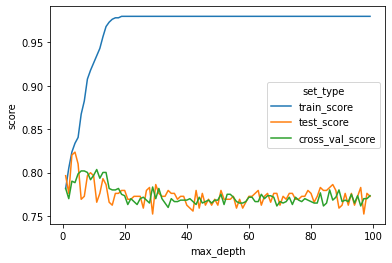

In [23]:
sns.lineplot(x='max_depth', y='score', hue='set_type', data= scores_data_long)

In [24]:
from sklearn.model_selection import GridSearchCV

In [25]:
clf = tree.DecisionTreeClassifier()

In [26]:
parameters={'criterion': ['gini', 'entropy'], 'max_depth':range(1, 30)}

In [27]:
grid_search_cv_clf = GridSearchCV(clf, parameters, cv=5)

In [28]:
grid_search_cv_clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 30)})

In [29]:
grid_search_cv_clf.best_params_

{'criterion': 'entropy', 'max_depth': 7}

In [30]:
best_clf = grid_search_cv_clf.best_estimator_

In [31]:
best_clf.score(X_test, y_test)

0.7728813559322034

In [32]:
from sklearn.metrics import precision_score, recall_score

In [33]:
y_pred = best_clf.predict(X_test)

In [34]:
precision_score(y_test, y_pred)

0.7789473684210526

In [35]:
recall_score(y_test, y_pred)

0.6166666666666667

In [36]:
y_predicted_prob = best_clf.predict_proba(X_test)

<AxesSubplot:>

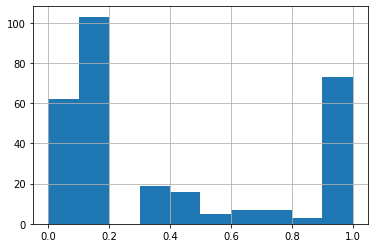

In [37]:
pd.Series(y_predicted_prob[:, 1]).hist()

In [38]:
import numpy as np
np.where(y_predicted_prob[:, 1] > 0.8, 1, 0)

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0])

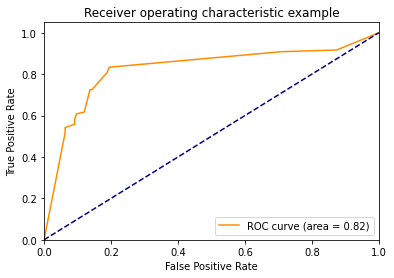

In [39]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_predicted_prob[:,1])
roc_auc= auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")


In [40]:
from sklearn.ensemble import RandomForestClassifier

clf_rf = RandomForestClassifier()
parametrs = {'n_estimators': [10,20,30], 'max_depth': [2,5,7,10]}
grid_search_cv_clf = GridSearchCV(clf_rf, parametrs, cv=5)
grid_search_cv_clf.fit(X_train, y_train)
grid_search_cv_clf.best_params_

{'max_depth': 5, 'n_estimators': 30}

In [42]:
best_clf = grid_search_cv_clf.best_estimator_

In [43]:
best_clf.score(X_test, y_test)

0.8169491525423729

In [47]:
feature_importances = best_clf.feature_importances_

In [49]:
feature_importances_df = pd.DataFrame({"feature":list(X_train), "feature_importances":feature_importances})

In [52]:
feature_importances_df.sort_values("feature_importances", ascending = False)

,feature,feature_importances
6,Sex_male,0.332547
5,Sex_female,0.171366
4,Fare,0.154274
0,Pclass,0.125226
1,Age,0.103113
2,SibSp,0.038335
3,Parch,0.033482
9,Embarked_S,0.019358
7,Embarked_C,0.011964
8,Embarked_Q,0.010334


In [55]:
data_heart = pd.read_csv(r"C:\Users\Rusta\YandexDisk\Jupyter_notebook\heart.csv")

In [56]:
data_heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [58]:
X = data_heart.drop(['target'], axis=1)
y = data_heart.target

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [68]:
np.random.seed(0)
rf = RandomForestClassifier(10, max_depth=5)
rf.fit(X, y)

RandomForestClassifier(max_depth=5, n_estimators=10)

<AxesSubplot:>

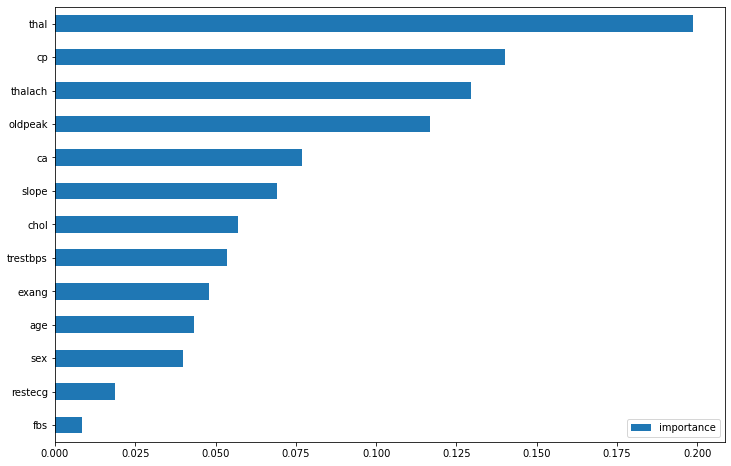

In [69]:
imp = pd.DataFrame(rf.feature_importances_, index=X.columns, columns=['importance'])
imp.sort_values('importance').plot(kind='barh', figsize=(12, 8))